In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn import model_selection
import os

In [2]:
RANDOM_SEED = 42
NUM_CLASSES = 5
dataset = 'keypoint_classifier/keypoint.csv'
model_save_path = 'keypoint_classifier/SimpleRNN_model.hdf5'

In [3]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [5]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
model = Sequential()
model.add(Dense(256, input_shape=(42,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [6]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               11008     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 45,194
Trainable params: 45,194
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/26 [>.............................] - ETA: 13s - loss: 2.4315 - accuracy: 0.0547
Epoch 1: saving model to keypoint_classifier\SimpleRNN_model.hdf5
26/26 [==============================] - 1s 8ms/step - loss: 1.7898 - accuracy: 0.3306 - val_loss: 1.4649 - val_accuracy: 0.4032
Epoch 2/1000
 1/26 [>.............................] - ETA: 0s - loss: 1.4709 - accuracy: 0.4375
Epoch 2: saving model to keypoint_classifier\SimpleRNN_model.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 1.3414 - accuracy: 0.4915 - val_loss: 1.2593 - val_accuracy: 0.5121
Epoch 3/1000
 1/26 [>.............................] - ETA: 0s - loss: 1.2319 - accuracy: 0.4844
Epoch 3: saving model to keypoint_classifier\SimpleRNN_model.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 1.1796 - accuracy: 0.5427 - val_loss: 1.1439 - val_accuracy: 0.5698
Epoch 4/1000
 1/26 [>.............................] - ETA: 0s - loss: 1.0458 - accuracy: 0.6016
Epoch 4: saving model to keypo

34/34 [==============================] - 0s 722us/step


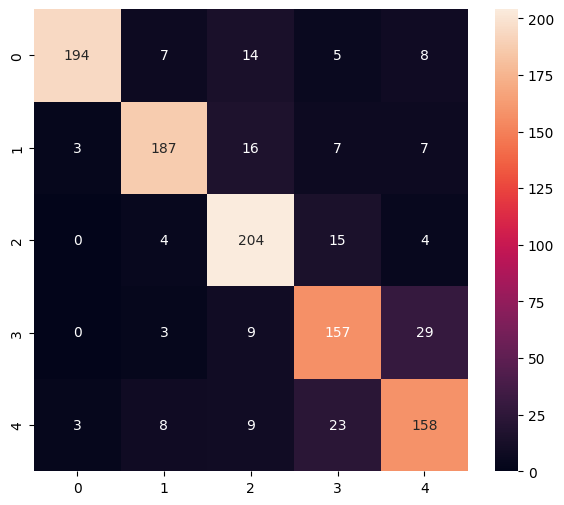

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       228
           1       0.89      0.85      0.87       220
           2       0.81      0.90      0.85       227
           3       0.76      0.79      0.78       198
           4       0.77      0.79      0.78       201

    accuracy                           0.84      1074
   macro avg       0.84      0.84      0.84      1074
weighted avg       0.84      0.84      0.84      1074



In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)